In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas as pd
import datetime


%matplotlib inline

In [63]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2020,1,1)


In [64]:
tesla = web.DataReader("TSLA","iex",start,end,api_key="sk_d0a3bb5ac9534db88dc8b66079928549" )
ford = web.DataReader("F","iex",start,end,api_key="sk_d0a3bb5ac9534db88dc8b66079928549" )
gm = web.DataReader("GM","iex",start,end,api_key="sk_d0a3bb5ac9534db88dc8b66079928549" )


In [65]:
tesla.head()

,open,high,low,close,volume
date,,,,,
2012-01-03,1.9293,1.9667,1.8433,1.8720,13920780.0
2012-01-04,1.8807,1.9113,1.8333,1.8473,9450540.0
2012-01-05,1.8507,1.8620,1.7900,1.8080,15081480.0
2012-01-06,1.8133,1.8527,1.7607,1.7940,14794305.0
2012-01-09,1.8000,1.8327,1.7413,1.8167,13454265.0


In [66]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 2012-01-03 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2019 non-null   float64
 1   high    2019 non-null   float64
 2   low     2019 non-null   float64
 3   close   2019 non-null   float64
 4   volume  2019 non-null   float64
dtypes: float64(5)
memory usage: 94.6+ KB


In [67]:
tesla.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

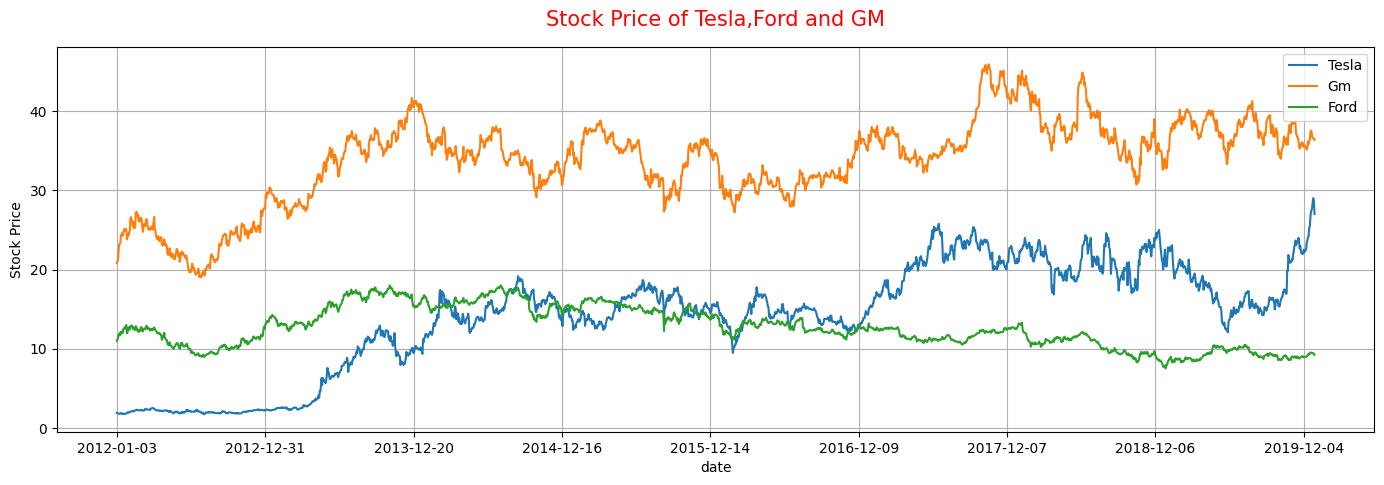

In [68]:
tesla["open"].plot(figsize=(17,5),label="Tesla")
gm["open"].plot(label="Gm")
ford["open"].plot(label="Ford")


font1 = {'family':'sans','color':'red','size':15}
plt.title("Stock Price of Tesla,Ford and GM",fontdict=font1,pad=(15))
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

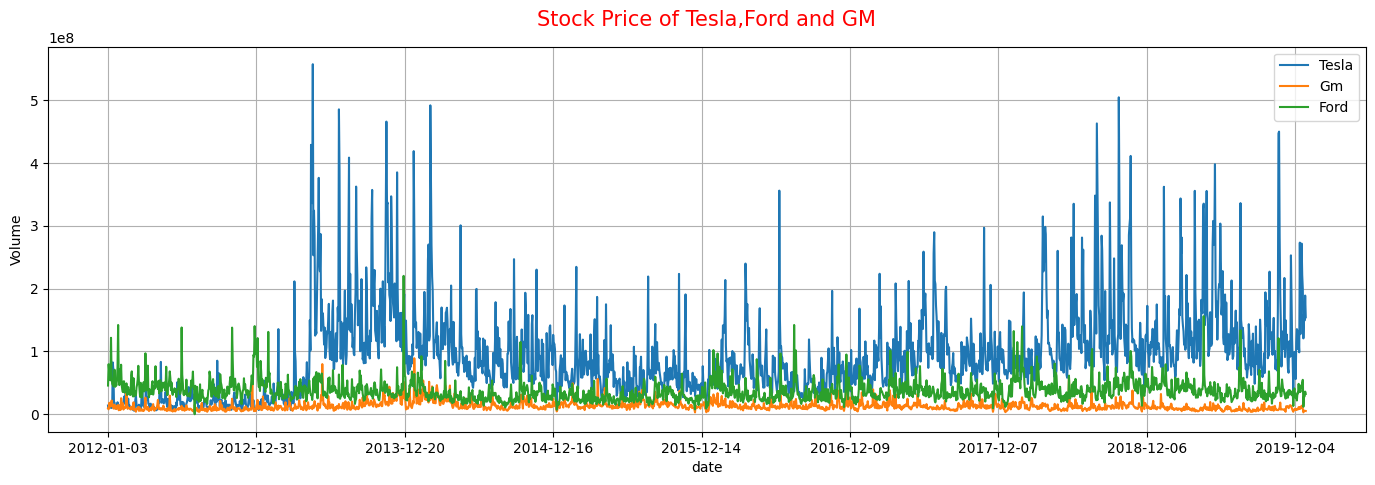

In [69]:
tesla["volume"].plot(figsize=(17,5),label="Tesla")
gm["volume"].plot(label="Gm")
ford["volume"].plot(label="Ford")


font1 = {'family':'sans','color':'red','size':15}
plt.title("Stock Price of Tesla,Ford and GM",fontdict=font1,pad=(15))
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.show()

In [70]:
ford.iloc[[ford["volume"].argmax()]]

,open,high,low,close,volume
date,,,,,
2013-12-18,15.99,16.0,15.17,15.65,220362796


In [71]:
tesla["total_trade"]= tesla["open"]*tesla["volume"]
tesla.head()

,open,high,low,close,volume,total_trade
date,,,,,,
2012-01-03,1.9293,1.9667,1.8433,1.8720,13920780.0,2.685736e+07
2012-01-04,1.8807,1.9113,1.8333,1.8473,9450540.0,1.777363e+07
2012-01-05,1.8507,1.8620,1.7900,1.8080,15081480.0,2.791130e+07
2012-01-06,1.8133,1.8527,1.7607,1.7940,14794305.0,2.682651e+07
2012-01-09,1.8000,1.8327,1.7413,1.8167,13454265.0,2.421768e+07


In [75]:
gm["total_trade"]= gm["open"]*gm["volume"]
gm.head()

,open,high,low,close,volume,total_trade
date,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08


In [76]:
ford["total_trade"]= ford["open"]*ford["volume"]
ford.head()

,open,high,low,close,volume,total_trade
date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08


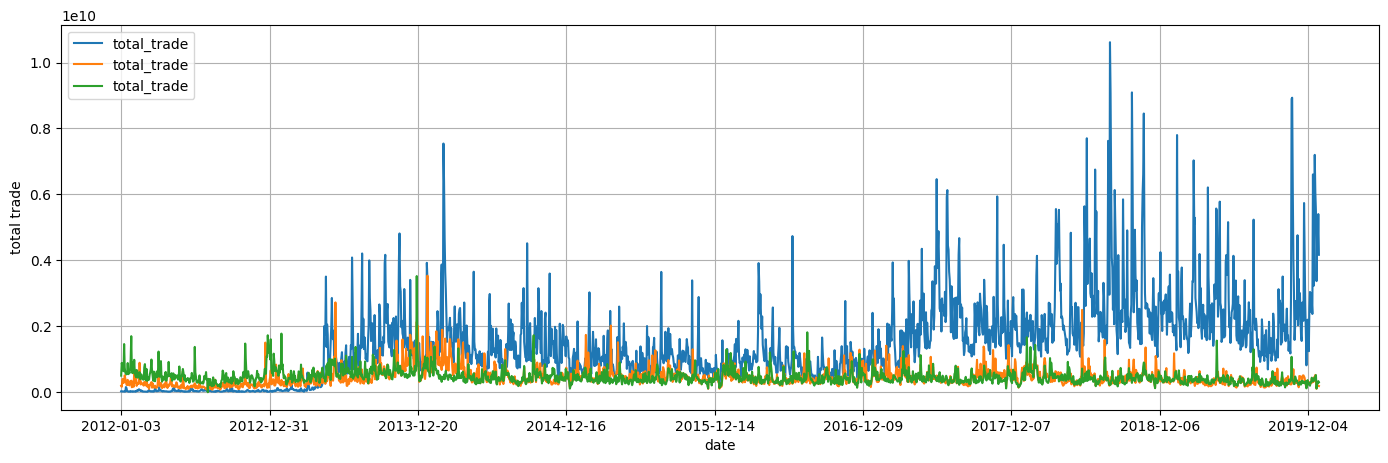

In [83]:
tesla["total_trade"].plot(figsize=(17,5))
gm["total_trade"].plot(figsize=(17,5))
ford["total_trade"].plot(figsize=(17,5))

plt.ylabel("total trade")
plt.legend()
plt.grid()
plt.show()


In [85]:
tesla.iloc[[tesla["total_trade"].argmax()]]

,open,high,low,close,volume,total_trade
date,,,,,,
2018-08-07,22.9227,25.8307,22.61,25.3047,463136520.0,1.061634e+10


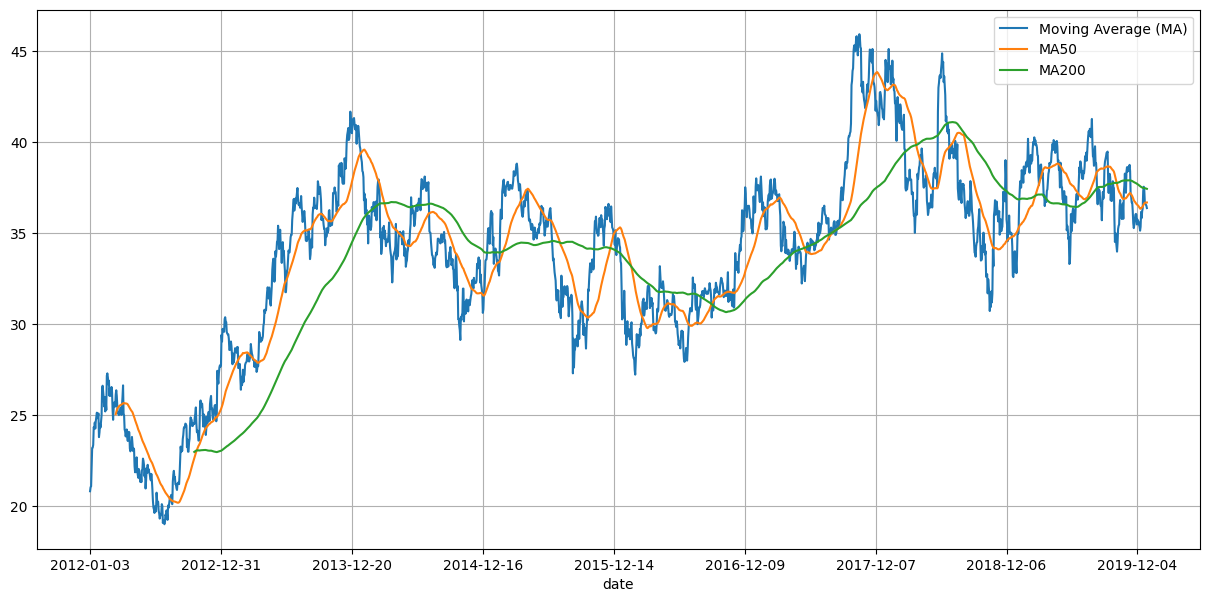

In [94]:
gm['open'].plot(figsize=(15,7),label="Moving Average (MA)")
gm['MA50']=gm["open"].rolling(50).mean()
gm['MA50'].plot()

gm['MA200']=gm["open"].rolling(200).mean()
gm['MA200'].plot()

plt.legend()
plt.grid()
plt.show()

In [99]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([tesla["open"],gm["open"],ford["open"]],axis=1)
car_comp.columns = ["Tesla Open","Gm Open","Ford Open"]

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Gm Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Gm Open'>,
        <Axes: xlabel='Gm Open', ylabel='Gm Open'>,
        <Axes: xlabel='Ford Open', ylabel='Gm Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='Gm Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

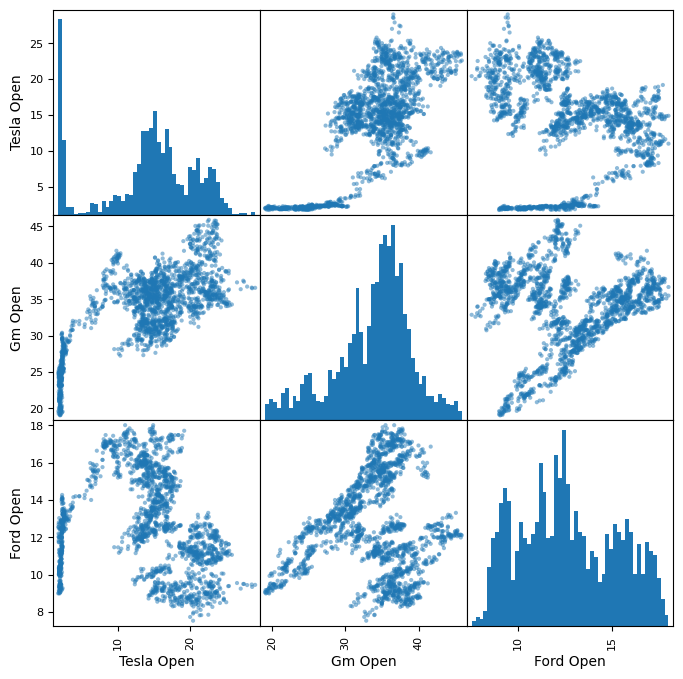

In [104]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={"bins":50})

In [108]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,MONDAY,DayLocator